8/ Thực hiện định danh mặt người từ dữ liệu (recognition):

### down dataset
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=70)
faces.images[1]

a/ Hãy thực hiện giảm chiều dữ liệu còn 100 thành phần (từ 62x47 = 2914 thành phần) bằng phương pháp PCA.

b/ Huấn luyện 2 mạng ANN với dữ liệu không giảm chiều và giảm chiều dữ liệu. Đánh giá, so sánh kết quả (run time, accuracy)

c/ Thử thay thế các tham số điều khiển ANN như Learning rate, hidden layer number, activation function.


In [1]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=70)
faces.images[1]

array([[0.14509805, 0.1633987 , 0.21437909, ..., 0.22352941, 0.1751634 ,
        0.13333334],
       [0.16601308, 0.21830066, 0.24183007, ..., 0.22875817, 0.21045752,
        0.16470589],
       [0.18169935, 0.25490198, 0.2901961 , ..., 0.20130719, 0.20784314,
        0.16209151],
       ...,
       [0.2888889 , 0.29673204, 0.3006536 , ..., 0.48104575, 0.4431373 ,
        0.45751634],
       [0.29673204, 0.29673204, 0.29803923, ..., 0.46405232, 0.44052288,
        0.46405232],
       [0.30457518, 0.3006536 , 0.29411766, ..., 0.44575164, 0.4509804 ,
        0.58300656]], dtype=float32)

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier


3
George W Bush


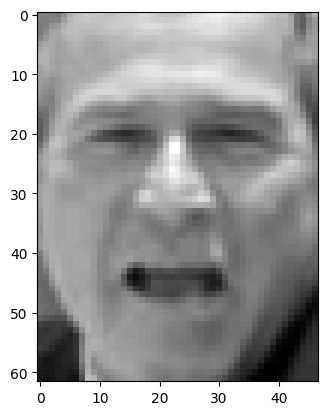

In [18]:
plt.imshow(faces.images[10], cmap = 'gray')
print(faces.target[10])
print(faces.target_names[faces.target[10]])

Original shape: (1288, 2914)
Transformed shape: (1288, 100)


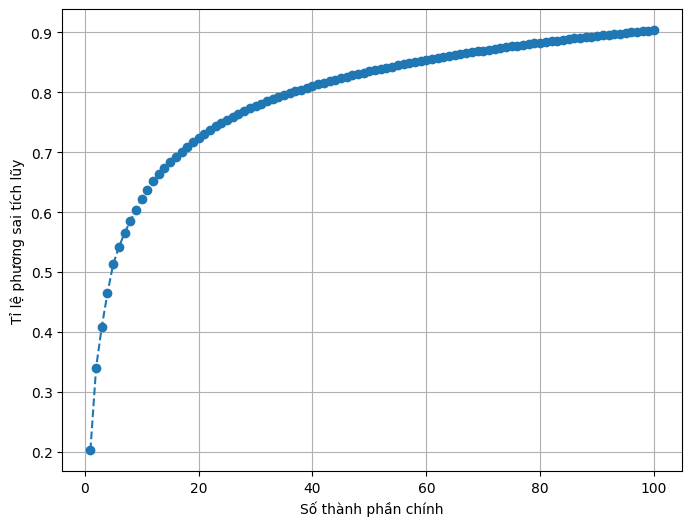

In [21]:
# a/ Hãy thực hiện giảm chiều dữ liệu còn 100 thành phần (từ 62x47 = 2914 thành phần) bằng phương pháp PCA.

X = faces.data
y = faces.target

# Áp dụng PCA giảm chiều xuống còn 100 thành phần
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)

# Kiểm tra kích thước dữ liệu sau khi giảm chiều
print(f"Original shape: {X.shape}")
print(f"Transformed shape: {X_pca.shape}")

# Vẽ biểu đồ thể hiện tỉ lệ phương sai được giải thích bởi từng thành phần chính
plt.figure(figsize=(8, 6))
plt.plot(range(1, 101), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Số thành phần chính')
plt.ylabel('Tỉ lệ phương sai tích lũy')
plt.grid(True)
plt.show()

In [ ]:
# b/ Huấn luyện 2 mạng ANN với dữ liệu không giảm chiều và giảm chiều dữ liệu. Đánh giá, so sánh kết quả (run time, accuracy)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
